In [2]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time

In [3]:
# Import the API key
from config import weather_api_key

In [4]:
# Starting URL for WeatherMap API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5cc9ad261292a20b92a7bc8c2d2ac550


In [5]:
# Import the datetime module from the datetime library
from datetime import datetime

In [6]:
# Create a set of random latitude and longitude combinations.
## Added without prompt on module
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Use the citipy module to determin city based on latitude and longitude
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [9]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list
# for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
    
    # Create endpoint URL with each city
#    city_url = url + "&q=" + cities[i]

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        weather_description = city_weather["weather"][0]["description"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,
                         "Current Description": weather_description})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | shingu
Processing Record 2 of Set 1 | saint george
Processing Record 3 of Set 1 | bambous virieux
Processing Record 4 of Set 1 | linchuan
City not found. Skipping...
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | mamallapuram
Processing Record 7 of Set 1 | bontang
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | sulangan
Processing Record 10 of Set 1 | kirakira
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | del rio
Processing Record 14 of Set 1 | mungwi
Processing Record 15 of Set 1 | pemangkat
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | serrai
City not found. Skipping...
Processing Record 18 of Set 1 | lavrentiya
Processing Record 19 of Set 1 | provideniya
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 o

Processing Record 41 of Set 4 | mayor pablo lagerenza
Processing Record 42 of Set 4 | port hueneme
Processing Record 43 of Set 4 | caceres
Processing Record 44 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 45 of Set 4 | paamiut
Processing Record 46 of Set 4 | faanui
Processing Record 47 of Set 4 | jinchang
Processing Record 48 of Set 4 | goundam
Processing Record 49 of Set 4 | ribeira grande
Processing Record 50 of Set 4 | sao filipe
Processing Record 1 of Set 5 | bafra
Processing Record 2 of Set 5 | cabra
Processing Record 3 of Set 5 | souillac
Processing Record 4 of Set 5 | clyde river
Processing Record 5 of Set 5 | nsanje
Processing Record 6 of Set 5 | hasaki
Processing Record 7 of Set 5 | mareeba
Processing Record 8 of Set 5 | flin flon
Processing Record 9 of Set 5 | dryden
Processing Record 10 of Set 5 | brigg
Processing Record 11 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 5 | pisco
Processing Record 13 of Set 5 | fortu

Processing Record 32 of Set 8 | serebryansk
Processing Record 33 of Set 8 | coos bay
Processing Record 34 of Set 8 | coolum beach
Processing Record 35 of Set 8 | ruiselede
Processing Record 36 of Set 8 | huarmey
Processing Record 37 of Set 8 | bayangol
Processing Record 38 of Set 8 | butka
Processing Record 39 of Set 8 | togur
Processing Record 40 of Set 8 | seoul
Processing Record 41 of Set 8 | kieta
Processing Record 42 of Set 8 | halifax
Processing Record 43 of Set 8 | codrington
Processing Record 44 of Set 8 | buraydah
Processing Record 45 of Set 8 | sabang
Processing Record 46 of Set 8 | nouadhibou
Processing Record 47 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 48 of Set 8 | otradnoye
Processing Record 49 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 50 of Set 8 | wajima
Processing Record 1 of Set 9 | christchurch
Processing Record 2 of Set 9 | inhumas
Processing Record 3 of Set 9 | batagay-alyta
Processing Record 4 of Set 9 | sept-il

Processing Record 24 of Set 12 | korla
Processing Record 25 of Set 12 | keffi
Processing Record 26 of Set 12 | warrington
Processing Record 27 of Set 12 | sorong
Processing Record 28 of Set 12 | soritor
Processing Record 29 of Set 12 | zolotinka
City not found. Skipping...
Processing Record 30 of Set 12 | khor
Processing Record 31 of Set 12 | dunning
Processing Record 32 of Set 12 | nalut
Processing Record 33 of Set 12 | teya
Processing Record 34 of Set 12 | yacuiba
Processing Record 35 of Set 12 | sablan
Processing Record 36 of Set 12 | tual
Processing Record 37 of Set 12 | yulara
Processing Record 38 of Set 12 | takahashi
Processing Record 39 of Set 12 | mount isa
Processing Record 40 of Set 12 | kloulklubed
Processing Record 41 of Set 12 | ittiri
Processing Record 42 of Set 12 | bhag
Processing Record 43 of Set 12 | prince rupert
Processing Record 44 of Set 12 | abalak
Processing Record 45 of Set 12 | nioki
Processing Record 46 of Set 12 | sarakhs
Processing Record 47 of Set 12 | ru

In [12]:
# Convert the array of dictionaries to a Pandas Dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Current Description
0,Shingu,33.7333,135.9833,41.65,62,22,18.43,JP,2021-02-17 04:37:12,few clouds
1,Saint George,37.1041,-113.5841,42.58,62,19,5.08,US,2021-02-17 04:37:12,few clouds
2,Bambous Virieux,-20.3428,57.7575,82.78,76,60,4.79,MU,2021-02-17 04:37:12,broken clouds
3,Mataura,-46.1927,168.8643,63.00,55,0,5.01,NZ,2021-02-17 04:37:13,clear sky
4,Mamallapuram,12.6264,80.1722,80.60,61,20,2.30,IN,2021-02-17 04:37:13,haze
5,Bontang,0.1333,117.5000,84.29,68,100,1.97,ID,2021-02-17 04:34:25,overcast clouds
6,Sulangan,11.1373,123.7228,80.74,79,98,24.72,PH,2021-02-17 04:37:14,overcast clouds
7,Kirakira,-10.4544,161.9205,83.32,75,90,1.39,SB,2021-02-17 04:37:14,overcast clouds
8,Saint-Philippe,-21.3585,55.7679,82.98,61,92,2.75,RE,2021-02-17 04:37:14,overcast clouds
9,Rikitea,-23.1203,-134.9692,78.78,76,27,14.14,PF,2021-02-17 04:37:14,light rain


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

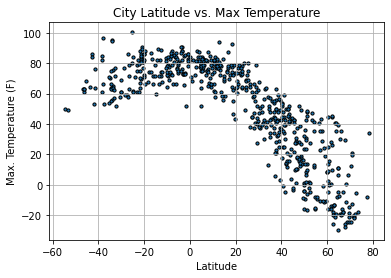

In [14]:
# Build a scatter plot for lat v max temp
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

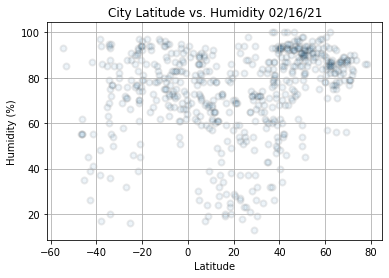

In [15]:
# Build a scatter plot for latitude v humidity
plt.scatter(city_data_df["Lat"],
           city_data_df["Humidity"],
           edgecolor="black", linewidths=2, marker="o",
           alpha=.08, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

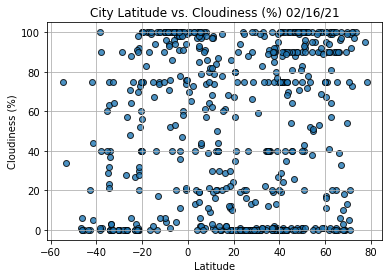

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
           city_data_df["Cloudiness"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

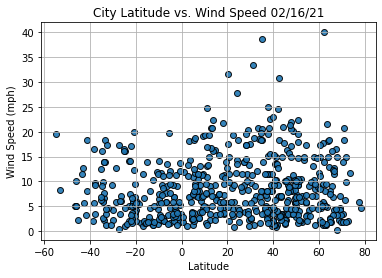

In [17]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
           city_data_df["Wind Speed"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=.9, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linear regression module
from scipy.stats import linregress

# Create a function to perform linear regression on weather data
# and plot a regression line with the equation
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()    

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Current Description
0,Shingu,33.7333,135.9833,41.65,62,22,18.43,JP,2021-02-17 04:37:12,few clouds
1,Saint George,37.1041,-113.5841,42.58,62,19,5.08,US,2021-02-17 04:37:12,few clouds
4,Mamallapuram,12.6264,80.1722,80.60,61,20,2.30,IN,2021-02-17 04:37:13,haze
5,Bontang,0.1333,117.5000,84.29,68,100,1.97,ID,2021-02-17 04:34:25,overcast clouds
6,Sulangan,11.1373,123.7228,80.74,79,98,24.72,PH,2021-02-17 04:37:14,overcast clouds


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

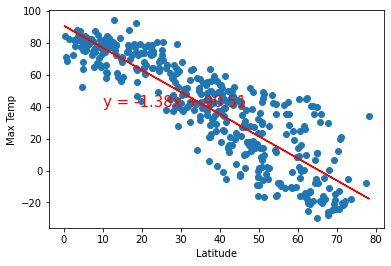

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

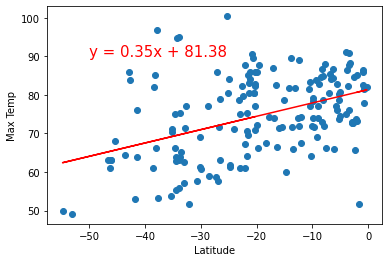

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

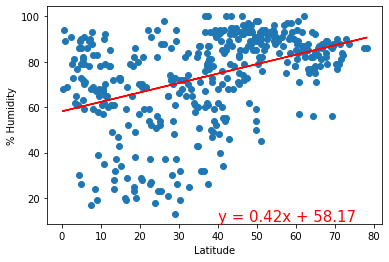

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

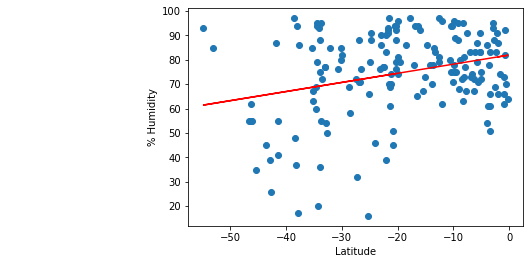

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-90,90))

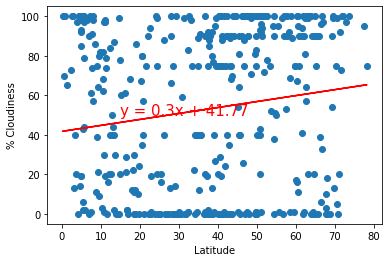

In [25]:
# Linear regression on the latitude and longitude of the northern hempisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for % Cloudiness', '% Cloudiness', (15,50))

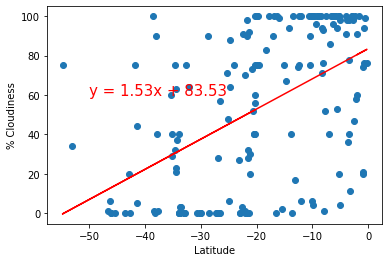

In [26]:
# Linear regression on the Southern Hemisphere for cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

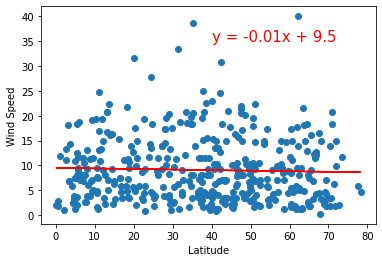

In [27]:
# Linear regression on the Northern Hemisphere wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

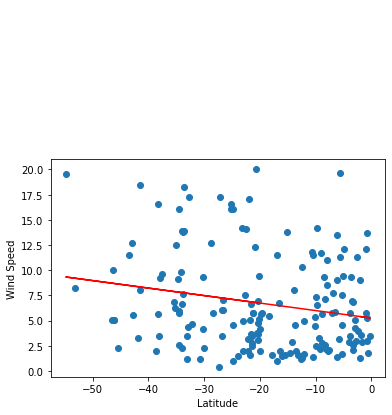

In [28]:
# Linear regression on the Southern Hemisphere wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))